In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from matplotlib.animation import FuncAnimation


In [99]:
with open('data/reset_splines.pkl', 'rb') as f:
    reset_splines = pickle.load(f)
with open('data/set_splines.pkl', 'rb') as f:
    set_splines = pickle.load(f)

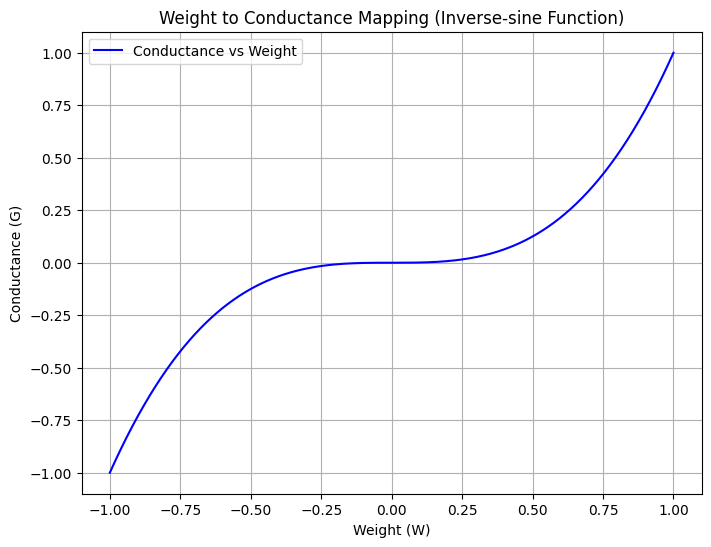

In [100]:
G_min, G_max = -1, 1
W_min, W_max = -1, 1

def weight_to_conductance(W, W_min, W_max, G_min, G_max):
    W_mid = (W_max+W_min)/2
    G_mid = (G_max + G_min)/2
    normalized_weight = (W-W_mid)/(W_max-W_mid)
    # normalized_conductance = 2/np.pi * np.arcsin(normalized_weight)
    normalized_conductance = normalized_weight**3
    conductance = normalized_conductance * (G_max - G_mid) + G_mid
    return conductance


# Generate weight values for plotting
W_values = np.linspace(W_min, W_max, 500)

# Map weights to conductances
G_values = weight_to_conductance(W_values, W_min, W_max, G_min, G_max)



# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(W_values, G_values, label='Conductance vs Weight', color='blue')
plt.title('Weight to Conductance Mapping (Inverse-sine Function)')
plt.xlabel('Weight (W)')
plt.ylabel('Conductance (G)')
plt.grid(True)
plt.legend()
plt.show()

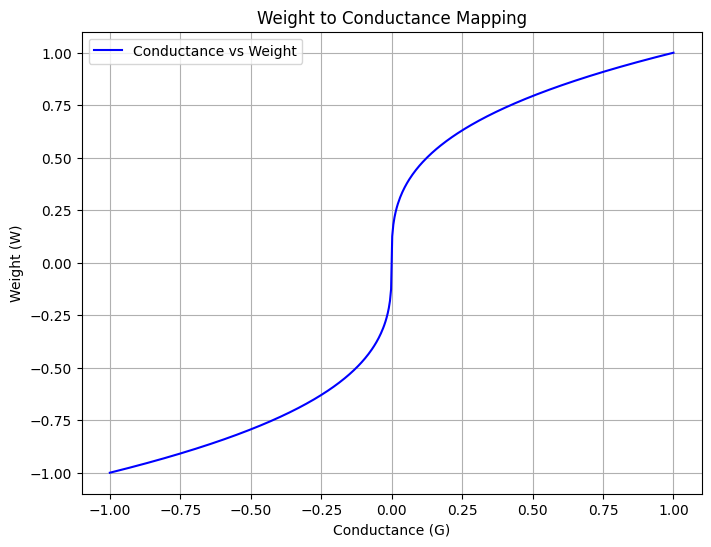

In [101]:

def conductance_to_weight(G, W_min, W_max, G_min, G_max):
    
    G_mid = (G_min+G_max)/2
    W_mid = (W_max+W_min)/2

    G_normalized = (G-G_mid)/(G_max-G_mid)
    # W_normalized = np.sin(G_normalized*np.pi/2)
    W_normalized = np.sign(G_normalized)*(np.abs(G_normalized))**(1/3) 

    weight = W_normalized*(W_max - W_mid) + W_mid

    return weight

G = np.linspace(G_min, G_max, 500)

# Map weights to conductances
W = conductance_to_weight(G, W_min, W_max, G_min, G_max)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(G, W, label='Conductance vs Weight', color='blue')
plt.title('Weight to Conductance Mapping')
plt.xlabel('Conductance (G)')
plt.ylabel('Weight (W)')
plt.grid(True)
plt.legend()
plt.show()

In [102]:

# Define a function to compute reset and set values
def compute_values(Vp_set, Vp_reset):
    reset_values = []
    set_values = []
    for g in np.linspace(G_min, G_max, 100):
        reset_values.append((g*1e6)*(reset_splines['1 us'](g, Vp_reset)[0][0]-1))
        set_values.append((g*1e6)*(set_splines['1 us'](g, Vp_set)[0][0]-1))
    return reset_values, set_values

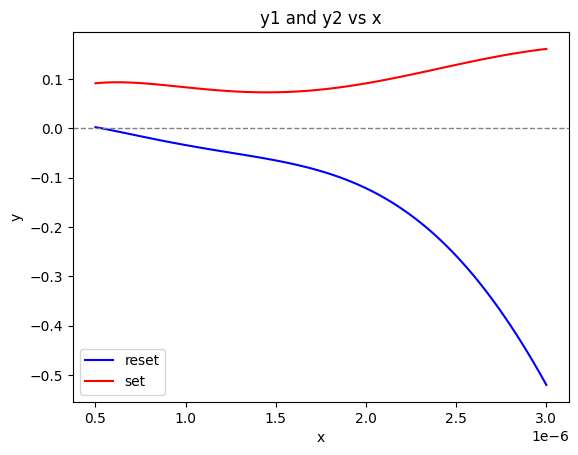

In [103]:
# reset_values, set_values = [], []
# Vp_set, Vp_reset, tp = 1.9, -2.2, "1 us"
G_min, G_max = 5e-7, 3e-6
# for g in np.linspace(G_min, G_max, 100):
#     reset_values.append(reset_splines['1 us'](g, Vp_reset)[0][0])
#     set_values.append(set_splines['1 us'](g, Vp_set)[0][0])
reset_values, set_values = compute_values(Vp_reset=-1.85, Vp_set=1.83)
# Plotting y1 and y2 against x
plt.plot(np.linspace(G_min, G_max, 100), reset_values, label='reset', color='blue')
plt.plot(np.linspace(G_min, G_max, 100), set_values, label='set', color='red')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

# Adding labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('y1 and y2 vs x')
plt.legend()

# Displaying the plot
plt.show()

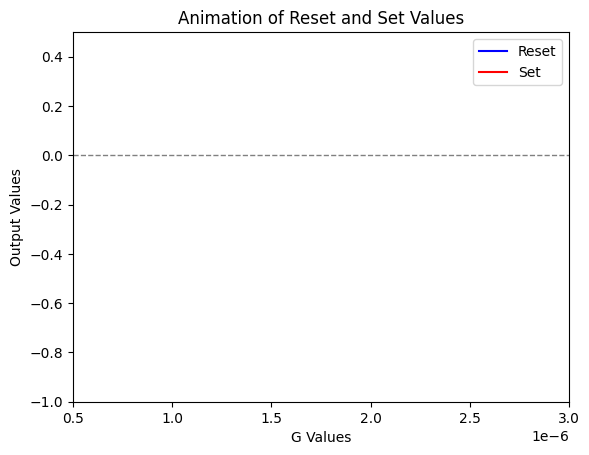

In [104]:


# Initialize figure and axis
fig, ax = plt.subplots()
line1, = ax.plot([], [], label='Reset', color='blue')
line2, = ax.plot([], [], label='Set', color='red')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.set_xlim(G_min, G_max)
ax.set_ylim(-1, 0.5)  # Adjust based on your expected y-values
ax.set_xlabel('G Values')
ax.set_ylabel('Output Values')
ax.set_title('Animation of Reset and Set Values')
ax.legend()

# Initialize function for the animation
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# Animation update function
def update(frame):
    # Vp_reset = -3 + (frame / 50) * (1.2)  # Increment from -3 to -1.8 over 50 frames
    Vp_set = 1.6 + (2.5-1.6) * (frame/100)
    reset_values, set_values = compute_values(Vp_set=Vp_set,Vp_reset=-1.85)
    line1.set_data(np.linspace(G_min, G_max, 100), reset_values)
    line2.set_data(np.linspace(G_min, G_max, 100), set_values)
    return line1, line2

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 100), init_func=init, blit=True, repeat=False)

# Display the animation
plt.show()

from IPython.display import HTML
HTML(ani.to_jshtml())